In [1]:
import pandas as pd
import numpy as np
import copy
import matplotlib.pyplot as plt

df = pd.read_csv("./w-10_cityscapes_unet_mobilenet/cityscapes_unet_mobilenet.csv")

In [2]:
df.columns

Index(['epoch', 'Cityscapes/Unet/mobilenet_v2/dice&bce/A100_512_512 - _step',
       'Cityscapes/Unet/mobilenet_v2/dice&bce/A100_512_512 - _step__MIN',
       'Cityscapes/Unet/mobilenet_v2/dice&bce/A100_512_512 - _step__MAX',
       'Cityscapes/Unet/mobilenet_v2/dice&bce/A100_512_512 - train_per_image_bIoU',
       'Cityscapes/Unet/mobilenet_v2/dice&bce/A100_512_512 - train_per_image_bIoU__MIN',
       'Cityscapes/Unet/mobilenet_v2/dice&bce/A100_512_512 - train_per_image_bIoU__MAX',
       'Cityscapes/Unet/mobilenet_v2/dice&bce/A100_512_512 - val_per_image_bIoU',
       'Cityscapes/Unet/mobilenet_v2/dice&bce/A100_512_512 - val_per_image_bIoU__MIN',
       'Cityscapes/Unet/mobilenet_v2/dice&bce/A100_512_512 - val_per_image_bIoU__MAX',
       'Cityscapes/Unet/mobilenet_v2/bce/A100_512_512 - _step',
       'Cityscapes/Unet/mobilenet_v2/bce/A100_512_512 - _step__MIN',
       'Cityscapes/Unet/mobilenet_v2/bce/A100_512_512 - _step__MAX',
       'Cityscapes/Unet/mobilenet_v2/bce/A100_512_512 

In [3]:
df.drop(columns=[col for col in df.columns if (col.find("_step") != -1) or (col.find("__MIN") != -1) or (col.find("__MAX") != -1)], inplace=True)
df.columns

Index(['epoch',
       'Cityscapes/Unet/mobilenet_v2/dice&bce/A100_512_512 - train_per_image_bIoU',
       'Cityscapes/Unet/mobilenet_v2/dice&bce/A100_512_512 - val_per_image_bIoU',
       'Cityscapes/Unet/mobilenet_v2/bce/A100_512_512 - train_per_image_bIoU',
       'Cityscapes/Unet/mobilenet_v2/bce/A100_512_512 - val_per_image_bIoU',
       'Cityscapes/Unet/mobilenet_v2/dist_transform/A100_512_512 - train_per_image_bIoU',
       'Cityscapes/Unet/mobilenet_v2/dist_transform/A100_512_512 - val_per_image_bIoU',
       'Cityscapes/Unet/mobilenet_v2/iou/A100_512_512 - train_per_image_bIoU',
       'Cityscapes/Unet/mobilenet_v2/iou/A100_512_512 - val_per_image_bIoU',
       'Cityscapes/Unet/mobilenet_v2/dice/A100_512_512 - train_per_image_bIoU',
       'Cityscapes/Unet/mobilenet_v2/dice/A100_512_512 - val_per_image_bIoU',
       'Cityscapes/Unet/mobilenet_v2/dice&focal/A100_512_512 - train_per_image_bIoU',
       'Cityscapes/Unet/mobilenet_v2/dice&focal/A100_512_512 - val_per_image_bIoU'],

In [4]:
# for cityscapes dataset
for col in df.columns:
    if col != "epoch":
        new_col_name = col.split("/")[-2] + " - " + col.split("/")[-1].split("- ")[-1]
        df.rename(columns={col:new_col_name}, inplace=True)
# df.columns = [col.split("/")[-1] for col in df.columns] # for celeb dataset
df.columns

Index(['epoch', 'dice&bce - train_per_image_bIoU',
       'dice&bce - val_per_image_bIoU', 'bce - train_per_image_bIoU',
       'bce - val_per_image_bIoU', 'dist_transform - train_per_image_bIoU',
       'dist_transform - val_per_image_bIoU', 'iou - train_per_image_bIoU',
       'iou - val_per_image_bIoU', 'dice - train_per_image_bIoU',
       'dice - val_per_image_bIoU', 'dice&focal - train_per_image_bIoU',
       'dice&focal - val_per_image_bIoU'],
      dtype='object')

In [5]:
train_df = copy.deepcopy(df).rename(columns={
    # 'distance_transform - train_per_image_bIoU': 'dist_transform', # for celeb dataset
    'dist_transform - train_per_image_bIoU': 'dist_transform', # for cityscapes dataset
    'bce - train_per_image_bIoU': 'bce',
    'iou - train_per_image_bIoU': 'iou',
    'dice - train_per_image_bIoU': 'dice',
    'dice&focal - train_per_image_bIoU': 'dice&focal',
    'dice&bce - train_per_image_bIoU': 'dice&bce',
})[['dist_transform', 'bce', 'iou', 'dice', 'dice&focal', 'dice&bce']].reset_index(drop=True)
train_df

,dist_transform,bce,iou,dice,dice&focal,dice&bce
0,0.000122,0.122013,0.081079,0.048345,0.000894,0.120799
1,0.000117,0.462657,0.408971,0.328151,0.028181,0.453247
2,0.116065,0.532800,0.445745,0.458076,0.181437,0.507287
3,0.215402,0.557598,0.401229,0.502329,0.367158,0.500338
4,0.364612,0.571084,0.395524,0.507433,0.433286,0.479373
5,0.426624,0.579185,0.416622,0.434201,0.460108,0.459512
6,0.446473,0.588052,0.461506,0.395599,0.472258,0.433700
7,0.458292,0.592115,0.549673,0.407535,0.499359,0.396309
8,0.469375,0.601635,0.589685,0.418741,0.513009,0.351167
9,0.473267,0.598305,0.598302,0.424982,0.513889,0.322693


In [6]:
val_df = copy.deepcopy(df).rename(columns={
    # 'distance_transform - train_per_image_bIoU': 'dist_transform', # for celeb dataset
    'dist_transform - val_per_image_bIoU': 'dist_transform', # for cityscapes dataset
    'bce - val_per_image_bIoU': 'bce',
    'iou - val_per_image_bIoU': 'iou',
    'dice - val_per_image_bIoU': 'dice',
    'dice&focal - val_per_image_bIoU': 'dice&focal',
    'dice&bce - val_per_image_bIoU': 'dice&bce',
})[['dist_transform', 'bce', 'iou', 'dice', 'dice&focal', 'dice&bce']].reset_index(drop=True)
val_df

,dist_transform,bce,iou,dice,dice&focal,dice&bce
0,0.000000,0.221962,0.266503,0.084764,0.001150,0.245052
1,0.002501,0.291623,0.307729,0.294828,0.058744,0.357386
2,0.149135,0.358069,0.304722,0.308972,0.280972,0.343069
3,0.190716,0.366990,0.304062,0.346688,0.371880,0.296793
4,0.324174,0.353816,0.310927,0.344160,0.358349,0.313407
5,0.405353,0.357424,0.345176,0.273605,0.421308,0.382424
6,0.380178,0.352345,0.370992,0.195827,0.467121,0.286008
7,0.426501,0.362534,0.420045,0.200099,0.461553,0.318461
8,0.407147,0.386463,0.409735,0.202954,0.380659,0.295033
9,0.436190,0.383711,0.421812,0.208206,0.358442,0.315181


In [7]:
# for col in train_df.columns:
#     value = round((train_df["dist_transform"] > train_df[col]).sum() / len(train_df)*100, 2)
#     print(f"Comparison with {col}: {value}")

In [8]:
train_stat_dict = dict()
for key in train_df.columns:
    train_stat_dict[key] = 0
# train_stat_dict

for idx, row in train_df.iterrows():
    train_stat_dict[row.idxmax()] += 1

for key in train_stat_dict.keys():
    train_stat_dict[key] = round(100 * train_stat_dict[key] / 60, 2)
train_stat_dict

{'dist_transform': 0.0,
 'bce': 16.67,
 'iou': 83.33,
 'dice': 0.0,
 'dice&focal': 0.0,
 'dice&bce': 0.0}

In [9]:
val_stat_dict = dict()
for key in val_df.columns:
    val_stat_dict[key] = 0
# train_stat_dict
for idx, row in val_df.iterrows():
    val_stat_dict[row.idxmax()] += 1
for key in val_stat_dict.keys():
    val_stat_dict[key] = round(100 * val_stat_dict[key] / 60, 2)
val_stat_dict

{'dist_transform': 43.33,
 'bce': 5.0,
 'iou': 36.67,
 'dice': 1.67,
 'dice&focal': 11.67,
 'dice&bce': 1.67}

In [10]:
# Specify the window size for the moving average
window_size = 10
train_moving_df = pd.DataFrame()
train_moving_df['epoch'] = df['epoch']
for col in train_df.columns:
    train_moving_df[col + '_moving_avg'] = round(train_df[col].rolling(window=window_size).mean(), 4)
    train_moving_df[col + '_moving_std'] = round(train_df[col].rolling(window=window_size).std(), 4)

train_moving_df.columns


Index(['epoch', 'dist_transform_moving_avg', 'dist_transform_moving_std',
       'bce_moving_avg', 'bce_moving_std', 'iou_moving_avg', 'iou_moving_std',
       'dice_moving_avg', 'dice_moving_std', 'dice&focal_moving_avg',
       'dice&focal_moving_std', 'dice&bce_moving_avg', 'dice&bce_moving_std'],
      dtype='object')

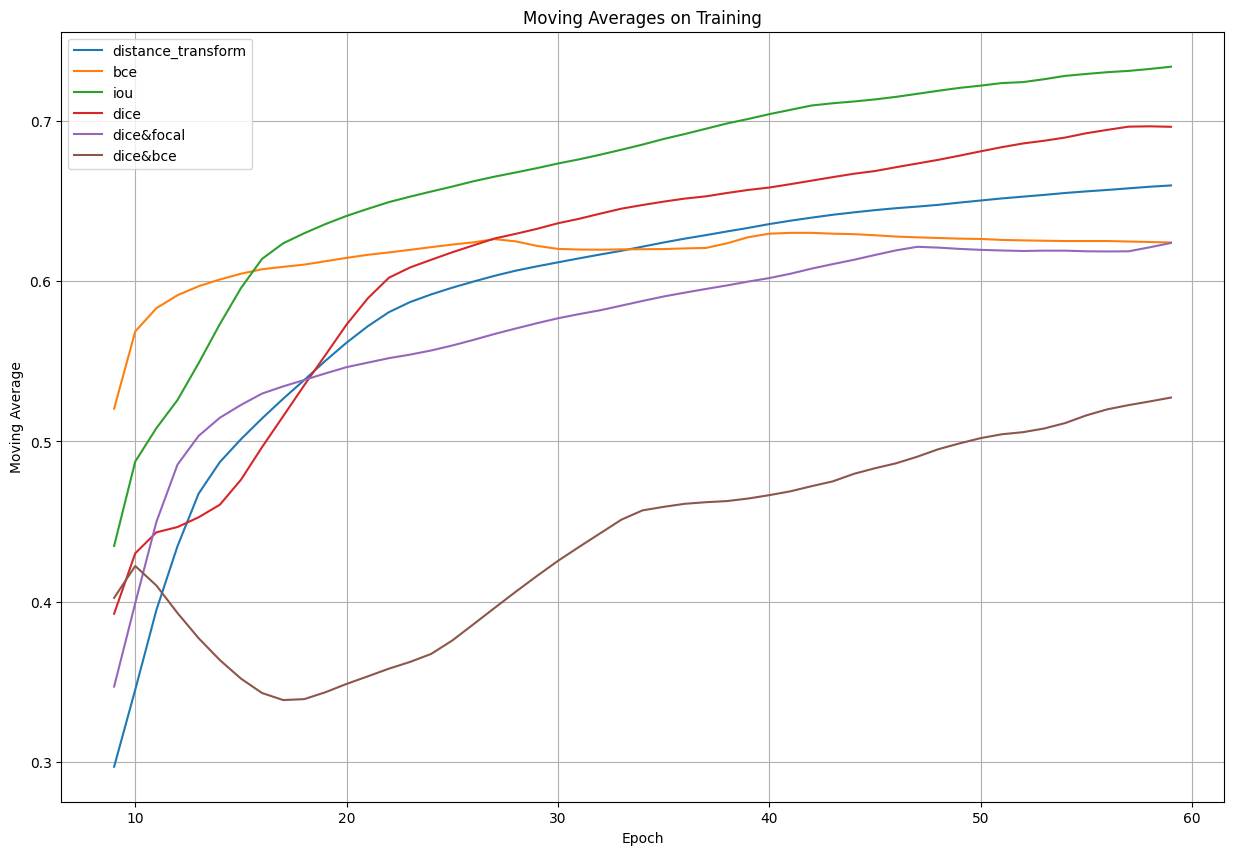

In [11]:
# Plot Moving Averages
plt.figure(figsize=(15, 10))
# marker='o', linestyle='--'
plt.plot(train_moving_df['epoch'], train_moving_df['dist_transform_moving_avg'], label='distance_transform')
plt.plot(train_moving_df['epoch'], train_moving_df['bce_moving_avg'], label='bce')
plt.plot(train_moving_df['epoch'], train_moving_df['iou_moving_avg'], label='iou')
plt.plot(train_moving_df['epoch'], train_moving_df['dice_moving_avg'], label='dice')
plt.plot(train_moving_df['epoch'], train_moving_df['dice&focal_moving_avg'], label='dice&focal')
plt.plot(train_moving_df['epoch'], train_moving_df['dice&bce_moving_avg'], label='dice&bce')
plt.xlabel('Epoch')
plt.ylabel('Moving Average')
plt.legend()
plt.title('Moving Averages on Training')
plt.grid(True)

plt.savefig("cityscapes_unet_mobilenet_training_moving_avgs.png")

plt.show()

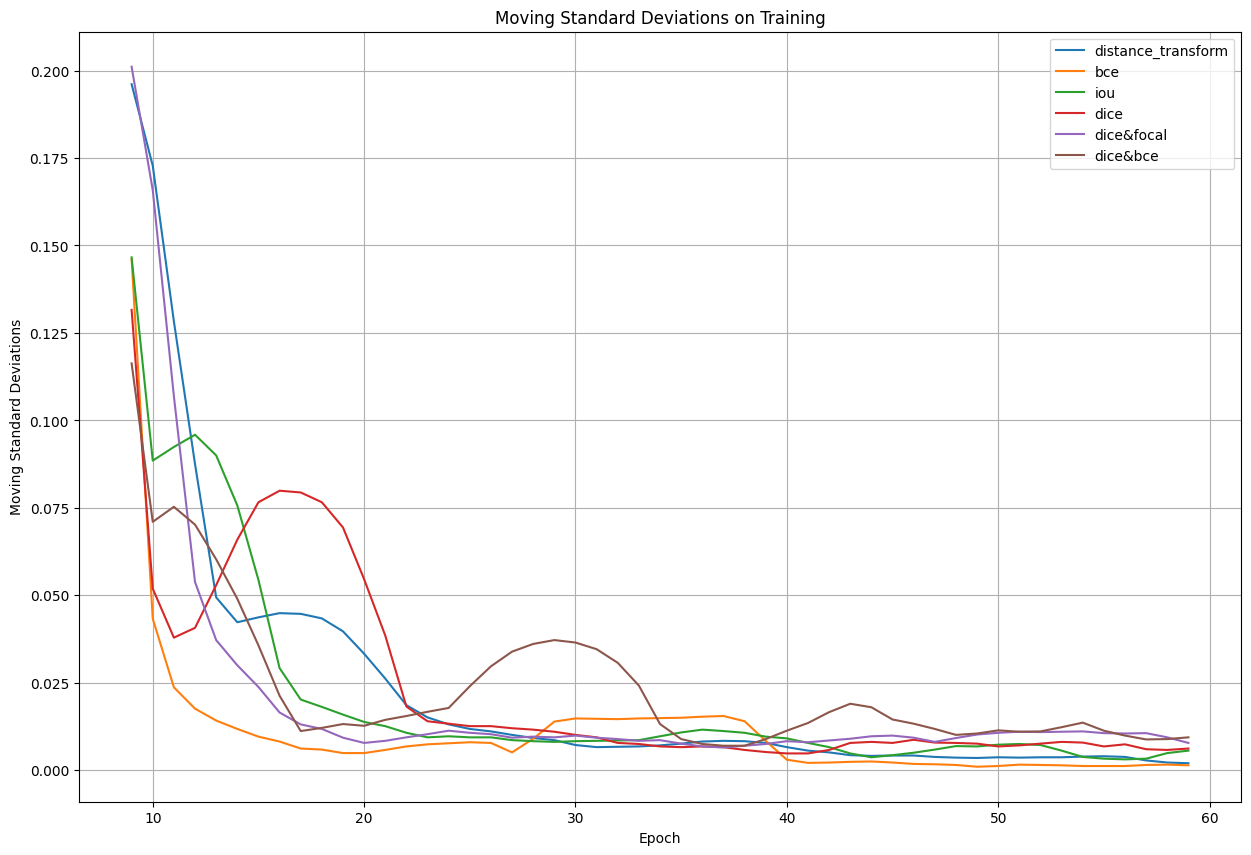

In [12]:
# Plot Moving Standard Deviations
plt.figure(figsize=(15, 10))
# marker='o', linestyle='--'
plt.plot(train_moving_df['epoch'], train_moving_df['dist_transform_moving_std'], label='distance_transform')
plt.plot(train_moving_df['epoch'], train_moving_df['bce_moving_std'], label='bce')
plt.plot(train_moving_df['epoch'], train_moving_df['iou_moving_std'], label='iou')
plt.plot(train_moving_df['epoch'], train_moving_df['dice_moving_std'], label='dice')
plt.plot(train_moving_df['epoch'], train_moving_df['dice&focal_moving_std'], label='dice&focal')
plt.plot(train_moving_df['epoch'], train_moving_df['dice&bce_moving_std'], label='dice&bce')
plt.xlabel('Epoch')
plt.ylabel('Moving Standard Deviations')
plt.legend()
plt.title('Moving Standard Deviations on Training')
plt.grid(True)

plt.savefig("cityscapes_unet_mobilenet_training_moving_stds.png")

plt.show()

In [13]:
# Specify the window size for the moving average
val_moving_df = pd.DataFrame()
val_moving_df['epoch'] = df['epoch']
for col in val_df.columns:
    val_moving_df[col + '_moving_avg'] = round(val_df[col].rolling(window=window_size).mean(), 4)
    val_moving_df[col + '_moving_std'] = round(val_df[col].rolling(window=window_size).std(), 4)

val_moving_df.columns


Index(['epoch', 'dist_transform_moving_avg', 'dist_transform_moving_std',
       'bce_moving_avg', 'bce_moving_std', 'iou_moving_avg', 'iou_moving_std',
       'dice_moving_avg', 'dice_moving_std', 'dice&focal_moving_avg',
       'dice&focal_moving_std', 'dice&bce_moving_avg', 'dice&bce_moving_std'],
      dtype='object')

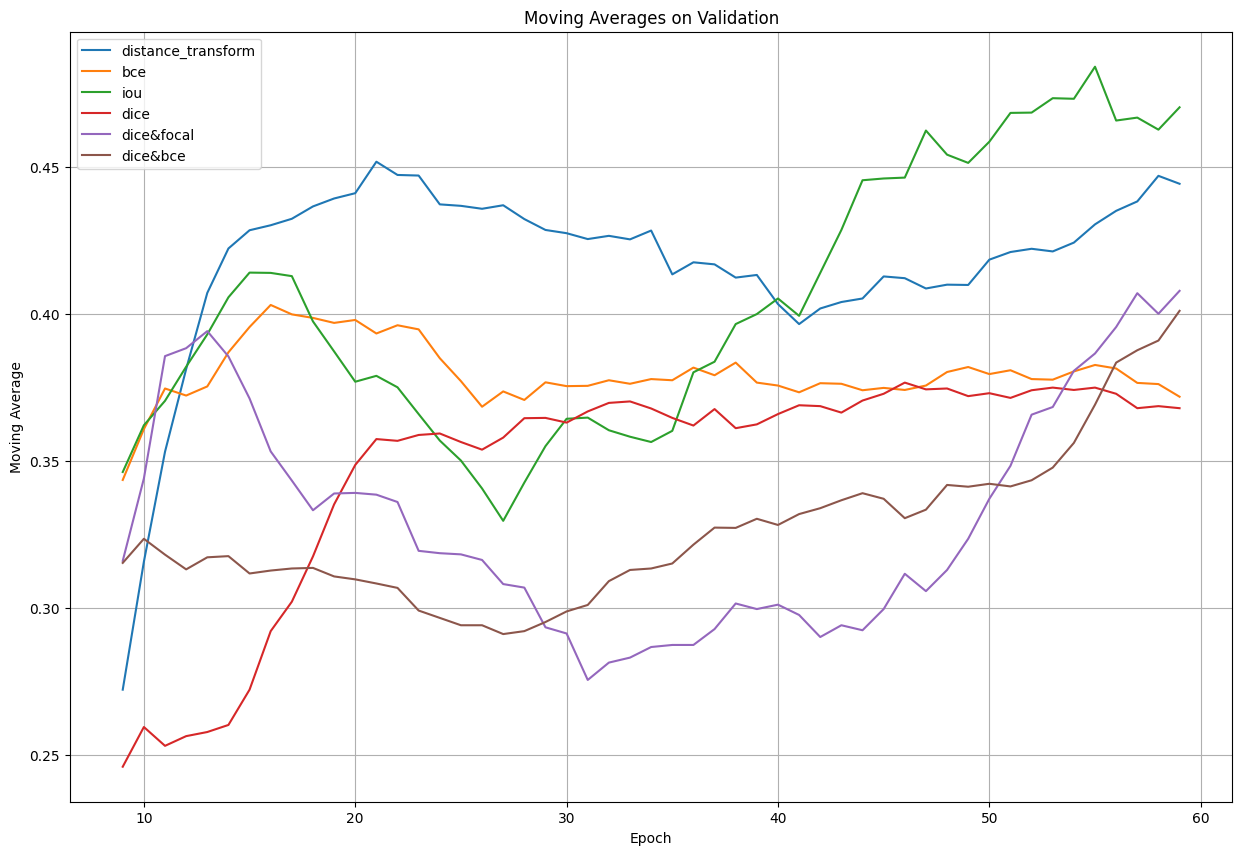

In [14]:
# Plot Moving Averages
plt.figure(figsize=(15, 10))
# marker='o', linestyle='--'
plt.plot(val_moving_df['epoch'], val_moving_df['dist_transform_moving_avg'], label='distance_transform')
plt.plot(val_moving_df['epoch'], val_moving_df['bce_moving_avg'], label='bce')
plt.plot(val_moving_df['epoch'], val_moving_df['iou_moving_avg'], label='iou')
plt.plot(val_moving_df['epoch'], val_moving_df['dice_moving_avg'], label='dice')
plt.plot(val_moving_df['epoch'], val_moving_df['dice&focal_moving_avg'], label='dice&focal')
plt.plot(val_moving_df['epoch'], val_moving_df['dice&bce_moving_avg'], label='dice&bce')
plt.xlabel('Epoch')
plt.ylabel('Moving Average')
plt.legend()
plt.title('Moving Averages on Validation')
plt.grid(True)

plt.savefig("cityscapes_unet_mobilenet_val_moving_avgs.png")

plt.show()

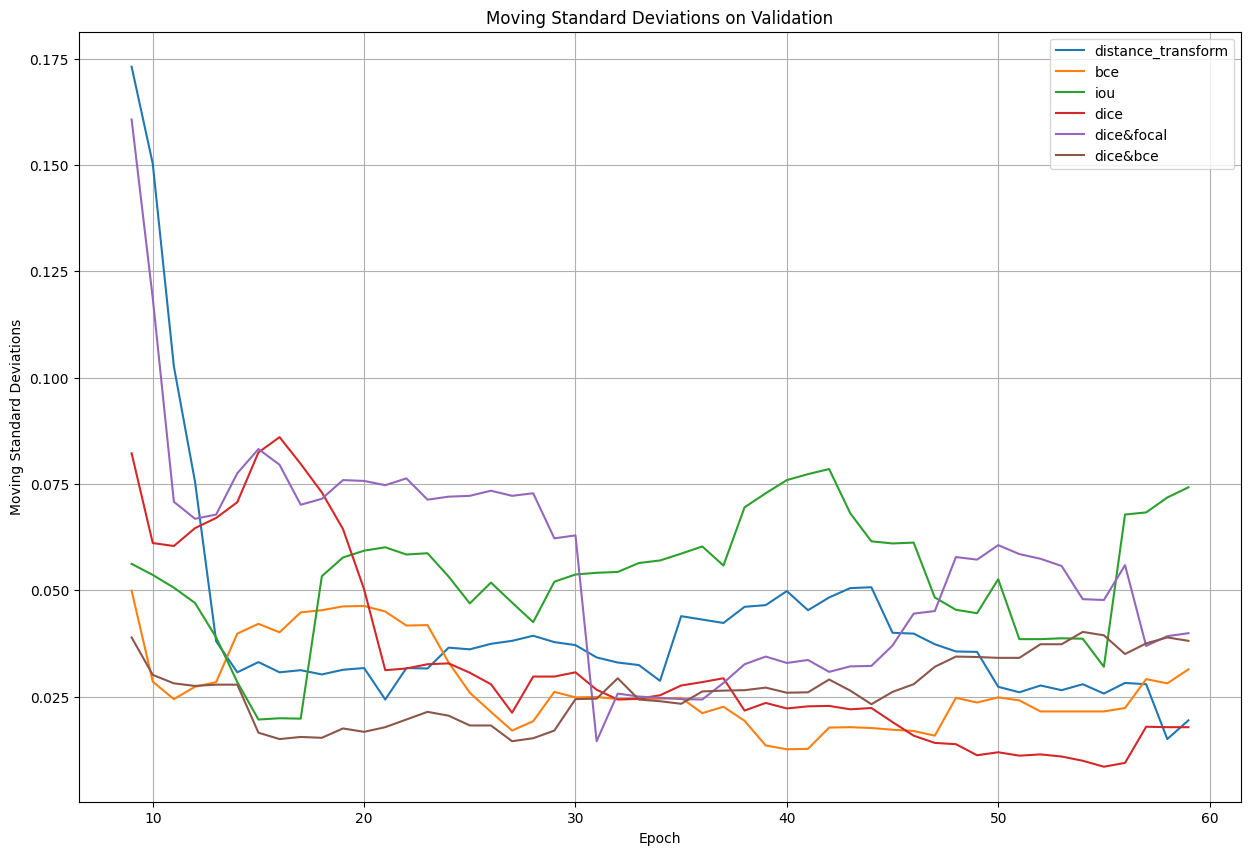

In [15]:
# Plot Moving Standard Deviations
plt.figure(figsize=(15, 10))
# marker='o', linestyle='--'
plt.plot(val_moving_df['epoch'], val_moving_df['dist_transform_moving_std'], label='distance_transform')
plt.plot(val_moving_df['epoch'], val_moving_df['bce_moving_std'], label='bce')
plt.plot(val_moving_df['epoch'], val_moving_df['iou_moving_std'], label='iou')
plt.plot(val_moving_df['epoch'], val_moving_df['dice_moving_std'], label='dice')
plt.plot(val_moving_df['epoch'], val_moving_df['dice&focal_moving_std'], label='dice&focal')
plt.plot(val_moving_df['epoch'], val_moving_df['dice&bce_moving_std'], label='dice&bce')
plt.xlabel('Epoch')
plt.ylabel('Moving Standard Deviations')
plt.legend()
plt.title('Moving Standard Deviations on Validation')
plt.grid(True)

plt.savefig("cityscapes_unet_mobilenet_val_moving_stds.png")

plt.show()